# Grafo 1

In [2]:
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [3]:
conexion1 = pd.DataFrame(
    {
        "inicio": ["1", "1", "1", "1", "2", "3", "3", "3", "4", "4", "5", "5", "6", "7", "8", "9", "10", "10"],
        "fin": ["2", "6", "5", "3", "6", "1", "3", "8", "8", "10", "6", "8", "7", "9", "9", "10", "10", "7"],
    }
)
conexion1

,inicio,fin
0,1,2
1,1,6
2,1,5
3,1,3
4,2,6
5,3,1
6,3,3
7,3,8
8,4,8
9,4,10


In [4]:
G1 = nx.from_pandas_edgelist(conexion1, source="inicio", target="fin", create_using=nx.MultiGraph())
pos = nx.spring_layout(G1, seed=42)

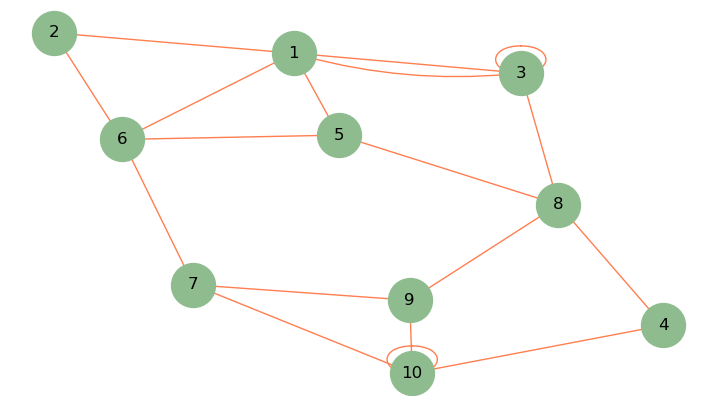

In [5]:
plt.figure(figsize=(9, 5))
nx.draw_networkx_nodes(G1, pos, node_color="darkseagreen", node_size=1000)
nx.draw_networkx_labels(G1, pos)

for u, v, k in G1.edges(keys=True):
    nx.draw_networkx_edges(G1, pos, edgelist=[(u, v)], connectionstyle=f'arc3, rad={0.1 * k}', edge_color="coral")

plt.axis('off')
plt.show()

In [6]:
#1) Obtener la matriz de adyacencia.
adjM1 = nx.adjacency_matrix(G1).todense()
adjM1

array([[0, 1, 1, 1, 2, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [2, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0]])

In [7]:
dimensión = adjM1.shape
dimensión

(10, 10)

In [8]:
#2) Conjunto de vértices 
print("Número de vértices:", G1.number_of_nodes())

Número de vértices: 10


In [9]:
#3) Conjunto de lados 
print("Número de lados:", G1.number_of_edges())

Número de lados: 18


In [10]:
#4) Lados Paralelos
paralelas = 0
contados = set()
for u, v in G1.edges():
    par = tuple(sorted([u, v]))
    if par not in contados:
        n = G1.number_of_edges(u, v)
        if n > 1:
            paralelas += n - 1  
        contados.add(par)

print("El total de lados paralelos es:", paralelas)


El total de lados paralelos es: 1


4) Lados Paralelos: e y q forman un lado paralelo.
5) Lazos o Ciclos: 2. En el vértice 3 y el vértice 10.
6) Vértices aislados: 0
7) ¿Es un Grafo simple? No, porque tiene lados paralelos y ciclos en el nodo 3 y 10.
8) ¿Es un grafo conexo? Si porque todos los vértices se conectan.

In [12]:
#9) Grado de cada vértice 
for i in range(1, 11):
    nodo_id = str(i)
    grado = G1.degree[nodo_id]
    print("Grado del nodo", nodo_id, ":", grado)

Grado del nodo 1 : 5
Grado del nodo 2 : 2
Grado del nodo 3 : 5
Grado del nodo 4 : 2
Grado del nodo 5 : 3
Grado del nodo 6 : 4
Grado del nodo 7 : 3
Grado del nodo 8 : 4
Grado del nodo 9 : 3
Grado del nodo 10 : 5


In [13]:
# 10) Grado total de G1 
suma_grados = sum(dict(G1.degree()).values())
print("Suma total de los grados del grafo:", suma_grados)

Suma total de los grados del grafo: 36


In [14]:
#11) ¿Tiene un circuito de Euler?
nx.is_eulerian(G1) # Los grados de los vértices no son pares.

False

# Grafo 2

In [16]:
conexion2 = pd.DataFrame(
    {
        "inicio": ["Cali", "Cali", "Cali", "Medellin", "Medellin", "Bogota", "Bogota", "Bogota", "Buga", "Buga", "Buga", "Buga", "Sincelejo", "Cucuta", "Cucuta", "Tulua"],
        "fin": ["Cali", "Medellin", "Bogota", "Medellin", "Bogota", "Medellin", "Buga", "Buga", "Bogota", "Sincelejo", "Cucuta", "Tulua", "Cucuta", "Sincelejo", "Tulua", "Tulua"],
    }
)
conexion2

,inicio,fin
0,Cali,Cali
1,Cali,Medellin
2,Cali,Bogota
3,Medellin,Medellin
4,Medellin,Bogota
5,Bogota,Medellin
6,Bogota,Buga
7,Bogota,Buga
8,Buga,Bogota
9,Buga,Sincelejo


In [17]:
G2 = nx.from_pandas_edgelist(conexion2, source="inicio", target="fin", create_using=nx.MultiGraph())
pos = nx.spring_layout(G2, seed=42)

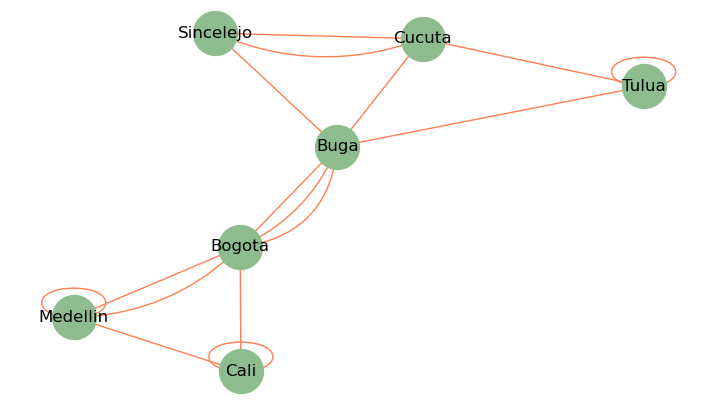

In [18]:
plt.figure(figsize=(9,5))
nx.draw_networkx_nodes(G2, pos, node_color="darkseagreen", node_size=1000)
nx.draw_networkx_labels(G2, pos)

for u, v, k in G2.edges(keys=True):
    nx.draw_networkx_edges(G2, pos, edgelist=[(u, v)], connectionstyle=f'arc3, rad={0.2 * k}', edge_color="coral")

plt.axis('off')
plt.show()

In [19]:
#1) Obtener la matriz de adyacencia.
adjM2 = nx.adjacency_matrix(G2).todense()
adjM2

array([[1, 1, 1, 0, 0, 0, 0],
       [1, 1, 2, 0, 0, 0, 0],
       [1, 2, 0, 3, 0, 0, 0],
       [0, 0, 3, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 1, 2, 0, 1],
       [0, 0, 0, 1, 0, 1, 1]])

In [20]:
dimensión = adjM2.shape
dimensión

(7, 7)

In [21]:
#2) Conjunto de vértices 
print("Número de vértices:", G2.number_of_nodes())

Número de vértices: 7


In [22]:
#3) Conjunto de lados 
print("Número de lados:", G2.number_of_edges())

Número de lados: 16


In [23]:
#4) Lados paralelos
paralelas = 0
contados = set()
for u, v in G2.edges():
    par = tuple(sorted([u, v]))
    if par not in contados:
        n = G2.number_of_edges(u, v)
        if n > 1:
            paralelas += n - 1
        contados.add(par)
print("El total de lados paralelos es: ", paralelas, "En Medellín y Bogotá, de Bogotá a Buga y Buga a Bogotá, de Sincelejo a Cúcuta.")

El total de lados paralelos es:  4 En Medellín y Bogotá, de Bogotá a Buga y Buga a Bogotá, de Sincelejo a Cúcuta.


5) Lazos o Ciclos: 3 (En los vértices Medellín, Calí, Tulúa)
6) Vértices aislados: 0
7) ¿Es un Grafo simple? No, porque tiene ciclos y lados paralelos.
8) ¿Es un grafo conexo? Si porque todos los vértices se conectan.

In [25]:
#9) Grado de cada vértice 
nombres = ("Cali", "Medellin", "Bogota", "Buga", "Sincelejo", "Tulua", "Cucuta")

for nodo_id in nombres:
    grado = G2.degree[nodo_id]
    print("Grado del nodo", nodo_id, ":", grado)

Grado del nodo Cali : 4
Grado del nodo Medellin : 5
Grado del nodo Bogota : 6
Grado del nodo Buga : 6
Grado del nodo Sincelejo : 3
Grado del nodo Tulua : 4
Grado del nodo Cucuta : 4


In [26]:
# 10) Grado total de G2 
suma_grados = sum(dict(G2.degree()).values())
print("Suma total de los grados del grafo:", suma_grados)

Suma total de los grados del grafo: 32


In [27]:
#11) ¿Tiene un circuito de Euler?
nx.is_eulerian(G2) #No todos los grados de los vértices son pares.

False